In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

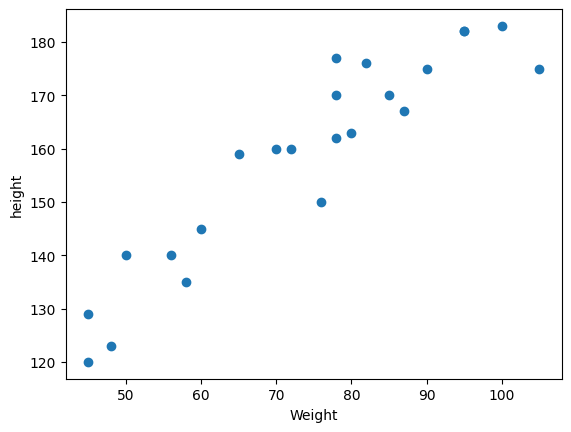

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("height")

In [33]:
x=df[['Weight']]
y=df['Height']

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [36]:
x.shape

(23, 1)

In [38]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

In [39]:
y_train.shape, y_test.shape

((18,), (5,))

In [40]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_train.shape

(18, 1)

In [41]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [42]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [44]:
X_test = scaler.transform(X_test)

In [45]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

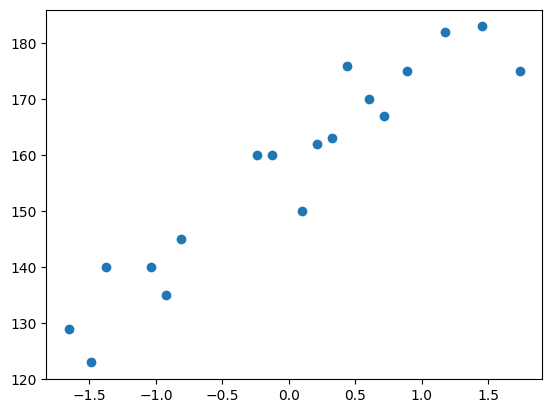

In [46]:
plt.scatter(X_train,y_train)

## Train the model

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
regression = LinearRegression()

In [49]:
regression.fit(X_train,y_train)

LinearRegression()

In [52]:
print("The slope or coefficient of weight is",regression.coef_)
print("Intercept",regression.intercept_)

The slope or coefficient of weight is [17.03440872]
Intercept 157.5


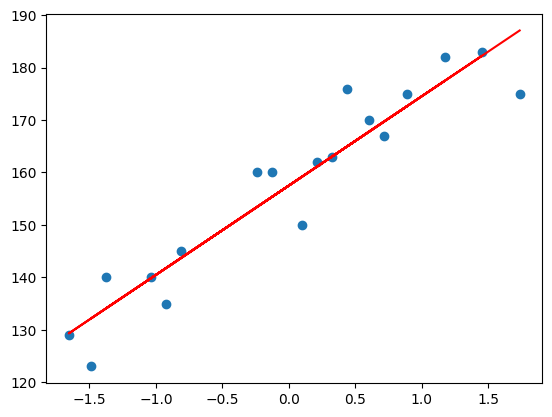

In [53]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [54]:
y_pred_test = regression.predict(X_test)

In [55]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

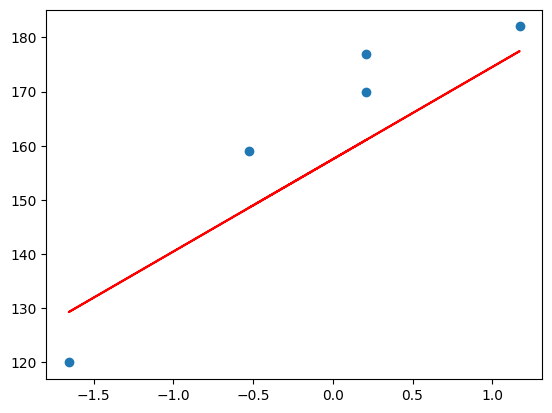

In [56]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test),'r')

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [59]:
mae = mean_absolute_error(y_test,y_pred_test)
mse = mean_squared_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [61]:
# new data point 80

scaled_weight = scaler.transform([[80]])
scaled_weight

c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [62]:
regression

LinearRegression()

In [64]:
print("The height for 80 kg is ",regression.predict([scaled_weight[0]]))

The height for 80 kg is  [163.01076266]
